In [1]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import pearsonr
import qgrid
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
qgrid.nbinstall()
%matplotlib inline
plt.style.use(u'fivethirtyeight')

# Power of Data Visualization

### EDA

- Data Analysis: process of transforming raw data into useful information.
- Steps: data collection -> data cleaning -> some analysis -> insights/usefil information
- Analysis: Descriptive Statistics, EDA, CDA

In [2]:
x = np.array([0, 10])
y = np.array([0.5, 39.5])
means = [x.mean(), y.mean()]  
stds = [x.std() / 3, y.std() / 3]
corr = 0.4      # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000).T
df = pd.DataFrame(m).T
df.columns = ['x','y']

Descriptive Statistics

In [3]:
df.head()

,x,y
0,5.591261,17.343757
1,5.621236,24.602229
2,6.891088,28.177843
3,6.604349,13.833174
4,4.988633,7.873327


In [4]:
df.describe()

,x,y
count,1000.000000,1000.000000
mean,4.963562,20.075749
std,1.654148,6.538199
min,-1.530644,0.497213
25%,3.855417,15.641505
50%,4.880847,20.232185
75%,6.121408,24.302533
max,9.826734,40.668205


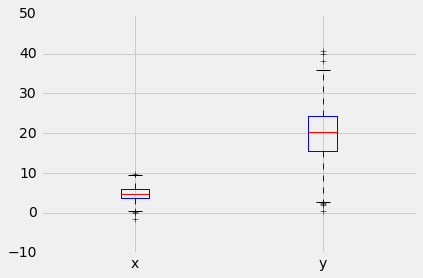

In [5]:
df.boxplot(return_type='axes')

In [6]:
slope, intercept = np.polyfit(df['x'], df['y'], 1)
x = np.linspace(0, 10, 10)
y = intercept + slope * x

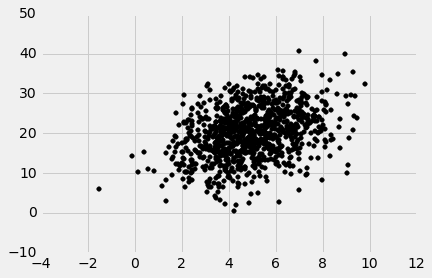

In [7]:
plt.scatter(df['x'], df['y'], color='black')

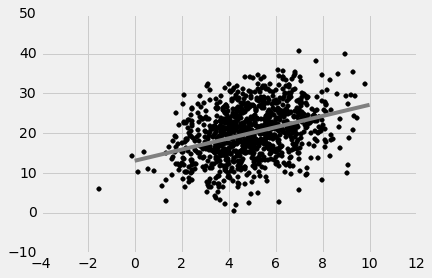

In [8]:
plt.scatter(df['x'], df['y'], color='black')
plt.plot(x, slope * x + intercept, color='gray')

Confirmatory Data Analysis

In [9]:
pearsonr(df['x'], df['y'])

(0.35546054386803683, 3.761661235589904e-31)

#### EDA: 
- normaly includes descriptive statistics
- does not involve hypothesis testing
- highly graphical
- iterative and interactive
- discover patterns from data
- make hypotheses based on patterns discovered
- identify and handle missing data

##### Case Study 1: Cigarette Sales in the US  
##### Case Study 2: Seattle Bike Share

## Power of Data Visualization

Goals
- sense-making: Discover (EDA) and understand stories
- communication: Tell a story

Good Visualization take into account:
- visual perception and cognition
- design principles that derive from human perception

In [10]:
from __future__ import print_function

import numpy as np
import pandas as pd
import seaborn as sns

from bokeh.embed import file_html
from bokeh.layouts import gridplot
from bokeh.models.glyphs import Circle, Line
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, Range1d
from bokeh.plotting import output_notebook, show, figure, output_file, save
output_notebook()

/Users/fernandogelin/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Loading BokehJS ...

In [11]:
raw_columns=[
[10.0,   8.04,   10.0,   9.14,   10.0,   7.46,   8.0,    6.58],
[8.0,    6.95,   8.0,    8.14,   8.0,    6.77,   8.0,    5.76],
[13.0,   7.58,   13.0,   8.74,   13.0,   12.74,  8.0,    7.71],
[9.0,    8.81,   9.0,    8.77,   9.0,    7.11,   8.0,    8.84],
[11.0,   8.33,   11.0,   9.26,   11.0,   7.81,   8.0,    8.47],
[14.0,   9.96,   14.0,   8.10,   14.0,   8.84,   8.0,    7.04],
[6.0,    7.24,   6.0,    6.13,   6.0,    6.08,   8.0,    5.25],
[4.0,    4.26,   4.0,    3.10,   4.0,    5.39,   19.0,   12.5],
[12.0,   10.84,  12.0,   9.13,   12.0,   8.15,   8.0,    5.56],
[7.0,    4.82,   7.0,    7.26,   7.0,    6.42,   8.0,    7.91],
[5.0,    5.68,   5.0,    4.74,   5.0,    5.73,   8.0,    6.89]]

quartet = pd.DataFrame(data=raw_columns, columns=
                       ['Ix','Iy','IIx','IIy','IIIx','IIIy','IVx','IVy'])

In [12]:
quartet[['Ix', 'Iy']]

,Ix,Iy
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.82


In [13]:
quartet[['IIx', 'IIy']]

,IIx,IIy
0,10,9.14
1,8,8.14
2,13,8.74
3,9,8.77
4,11,9.26
5,14,8.10
6,6,6.13
7,4,3.10
8,12,9.13
9,7,7.26


In [14]:
quartet[['IIIx', 'IIIy']]

,IIIx,IIIy
0,10,7.46
1,8,6.77
2,13,12.74
3,9,7.11
4,11,7.81
5,14,8.84
6,6,6.08
7,4,5.39
8,12,8.15
9,7,6.42


In [15]:
quartet[['IVx', 'IVy']]

,IVx,IVy
0,8,6.58
1,8,5.76
2,8,7.71
3,8,8.84
4,8,8.47
5,8,7.04
6,8,5.25
7,19,12.50
8,8,5.56
9,8,7.91


In [16]:
quartet[['Ix', 'Iy']].describe()

,Ix,Iy
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [17]:
quartet[['IIx', 'IIy']].describe()

,IIx,IIy
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [18]:
quartet[['IIIx', 'IIIy']].describe()

,IIIx,IIIy
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [22]:
quartet[['IVx', 'IVx']].describe()

,IVx,IVy
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


In [37]:
pearsonr(quartet['Ix'], quartet['Iy'])[0]

0.81642051634484003

In [38]:
pearsonr(quartet['IIx'], quartet['IIy'])[0]

0.81623650600024267

In [39]:
pearsonr(quartet['IIIx'], quartet['IIIy'])[0]

0.81628673948959807

In [40]:
pearsonr(quartet['IVx'], quartet['IVy'])[0]

0.81652143688850298

In [33]:
slope, intercept = np.polyfit(quartet['Ix'], quartet['Iy'], 1)
print("y = %s + %s * x" % (intercept, slope))

y = 3.00009090909 + 0.500090909091 * x


In [34]:
slope, intercept = np.polyfit(quartet['IIx'], quartet['IIy'], 1)
print("y = %s + %s * x" % (intercept, slope))

y = 3.00090909091 + 0.5 * x


In [35]:
slope, intercept = np.polyfit(quartet['IIIx'], quartet['IIIy'], 1)
print("y = %s + %s * x" % (intercept, slope))

y = 3.00245454545 + 0.499727272727 * x


In [36]:
slope, intercept = np.polyfit(quartet['IVx'], quartet['IVy'], 1)
print("y = %s + %s * x" % (intercept, slope))

y = 3.00172727273 + 0.499909090909 * x


In [20]:
circles_source = ColumnDataSource(
    data = dict(
        xi   = quartet['Ix'],
        yi   = quartet['Iy'],
        xii  = quartet['IIx'],
        yii  = quartet['IIy'],
        xiii = quartet['IIIx'],
        yiii = quartet['IIIy'],
        xiv  = quartet['IVx'],
        yiv  = quartet['IVy'],
    )
   )

x = np.linspace(-0.5, 20.5, 10)
y = 3 + 0.5 * x
lines_source = ColumnDataSource(data=dict(x=x, y=y))

xdr = Range1d(start=-0.5, end=20.5)
ydr = Range1d(start=-0.5, end=20.5)

def make_plot(title, xname, yname):
    plot = figure(x_range=xdr, y_range=ydr, plot_width=400, plot_height=400,
                border_fill_color='white', background_fill_color='white', tools=['save'])
    plot.title.text = title

    line = Line(x='x', y='y', line_color='red', line_width=2)
    plot.add_glyph(lines_source, line)

    circle = Circle(
        x=xname, y=yname, size=12,
        fill_color='orange', line_alpha=0, fill_alpha=0.5
    )
    plot.add_glyph(circles_source, circle)

    return plot

#where will this comment show up
I   = make_plot('I',   'xi',   'yi')
II  = make_plot('II',  'xii',  'yii')
III = make_plot('III', 'xiii', 'yiii')
IV  = make_plot('IV',  'xiv',  'yiv')

grid = gridplot([[I, II], [III, IV]])

In [21]:
show(grid)

- One of the great strengths of data visualization is our ability to process visual information much more rapidly than verbal information.  
- differences in length, size, hue, color intensity, angle, texture, shape, and so on, as the building blocks of data visualization.  
- When we do so in an informed manner, we have the ability to transfer much of the work that is needed to decode the contents of a visual display, such as a graph, from the slower conscious, energy intensive parts of the brain to the faster parts of the brain that require less energy, which results in more efficient cognition.  
- Good data visualization techniques and technologies, properly used, can extend our thinking into new realms of analytical sensemaking, and we are still only beginning to tap into this potential.

#### Tufte's criteria for good visualization:  
- Graphical Excellence  
- Visual Integrity
- Maximizing the Data-Ink Ratio
- Aesthetic Elegance